# **[2010년대~20년대 영화 top 600개 분석]**
*feat. 한국 사람들이 선호하는 영화 장르는*?

*한국 영화 흥행을 위해 감독들은 어떤 장르를 많이 만들어야 하나?*

In [ ]:
import numpy as np

In [ ]:
import pandas as pd 
import lightgbm as lgb

In [ ]:
df = pd.read_csv('movies_train.csv')

+ title : 영화의 제목
+ distributor : 배급사
+ genre : 장르
+ release_time : 개봉일
+ time : 상영시간(분)
+ screening_rat : 상영등급
+ director : 감독이름
+ dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
+ dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
+ num_staff : 스텝수
+ num_actor : 주연배우수
+ box_off_num : 관객수

In [ ]:
df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [ ]:
print(df.shape)

(600, 12)


**[결측치 있는지 확인해보기]**



In [ ]:
df.isnull().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

**[데이터 요약해보기]**

1. 어떤 칼럼이 있는지, 어떤 타입인지 확인하기

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


2.데이터 타입

In [ ]:
df.dtypes

title              object
distributor        object
genre              object
release_time       object
time                int64
screening_rat      object
director           object
dir_prev_bfnum    float64
dir_prev_num        int64
num_staff           int64
num_actor           int64
box_off_num         int64
dtype: object

3.컬럼 이름

In [ ]:
df.columns

Index(['title', 'distributor', 'genre', 'release_time', 'time',
       'screening_rat', 'director', 'dir_prev_bfnum', 'dir_prev_num',
       'num_staff', 'num_actor', 'box_off_num'],
      dtype='object')

4. 수치형 데이터에 대한 요약

In [ ]:
df.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.000000,2.700000e+02,600.000000,600.000000,600.000000,6.000000e+02
mean,100.863333,1.050443e+06,0.876667,151.118333,3.706667,7.081818e+05
std,18.097528,1.791408e+06,1.183409,165.654671,2.446889,1.828006e+06
min,45.000000,1.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,89.000000,2.038000e+04,0.000000,17.000000,2.000000,1.297250e+03
50%,100.000000,4.784236e+05,0.000000,82.500000,3.000000,1.259100e+04
75%,114.000000,1.286569e+06,2.000000,264.000000,4.000000,4.798868e+05
max,180.000000,1.761531e+07,5.000000,869.000000,25.000000,1.426277e+07


In [ ]:
1.050443 * 10 ** 6

1050443.0

In [ ]:
pd.options.display.float_format = '{:.1f}'.format

**[어느 장르를 사람들이 많이 보는가?]**

In [ ]:
train[['genre', 'box_off_num']].groupby('genre').mean().sort_values('box_off_num')

,box_off_num
genre,
뮤지컬,6627.0
다큐멘터리,67172.3
서스펜스,82611.0
애니메이션,181926.7
멜로/로맨스,425968.0
미스터리,527548.2
공포,590832.5
드라마,625689.8
코미디,1193914.0


2010년대~20년대까지 사람들이 가장 많이 본 영화 장르 top 5를 선정하자면, 다음과 같다.

느와르 / 액션 / SF / 코미디 /드라마

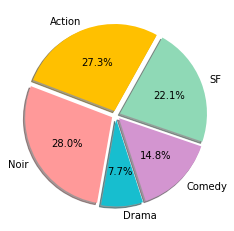

In [37]:
import matplotlib.pyplot as plt

ratio = [2263695, 2203974, 1788345, 1193914, 625689]
labels = ['Noir', 'Action', 'SF', 'Comedy', 'Drama']
explode = [0.05, 0.05, 0.05, 0.05, 0.05]
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', '#17becf']

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, shadow=True, colors=colors)
plt.show()

**[1000만 관객 이상 영화 장르 확인하기]**

In [ ]:
df_20 = df.loc[df['box_off_num'] > 10000000]
df_20.shape

(6, 12)

In [ ]:
df_20.genre.value_counts()

드라마    3
느와르    1
코미디    1
액션     1
Name: genre, dtype: int64

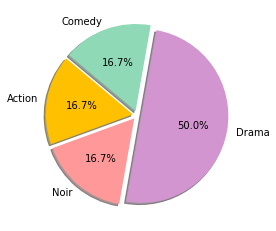

In [39]:
import matplotlib.pyplot as plt

ratio = [1, 1, 1, 3]
labels = ['Noir', 'Action', 'Comedy', 'Drama']
explode = [0.05, 0.05, 0.05, 0.05]
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, shadow=True, colors=colors)
plt.show()

**[어느 장르의 영화가 가장 많이 만들어졌는가?]**

In [ ]:
category = pd.DataFrame(df['genre'].value_counts()).reset_index()
category.columns = ['genre', 'counts']
category

,genre,counts
0,드라마,221
1,다큐멘터리,93
2,멜로/로맨스,78
3,코미디,53
4,공포,42
5,액션,28
6,느와르,27
7,애니메이션,21
8,미스터리,17
9,SF,13


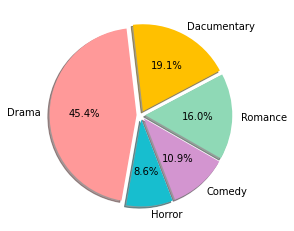

In [38]:
import matplotlib.pyplot as plt

ratio = [221, 93, 78, 53, 42]
labels = ['Drama', 'Dacumentary', 'Romance', 'Comedy', 'Horror']
explode = [0.05, 0.05, 0.05, 0.05, 0.05]
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', '#17becf']

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, shadow=True, colors=colors)
plt.show()

# **결과 및 결언**

처음 우리 조는 코로나로 인해 침체한 영화 산업을 회복하기 위해 어떤 노력을 해야 할지에 대한 고민을 중심으로 현재 국내와 국외 영화를 전부 합쳐 사람들의 관심을 많이 받은 영화 top 5개를 분석하기로 했다. 5개의 영화를 확인해 본 결과 5개 중 4개는 한국영화 나머지 1개는 외국영화임을 알 수 있었다. top 100까지 살펴본 결과 한국의 경우는 약 7대 3정도로 상대적으로 한국영화의 점유율이 높은 것을 알 수 있었고 이에 우리나라 영화산업을 다시 부흥시키기 위해서는 사람들에게 인기가 있는 영화장르를 분석할 필요를 느껴 이번 파트의 분석을 진행했다. 진행 결과 사람들은 느와르와 액션 위주의 영화를 선호하며 그 안에서 코미디와 드라마의 요소가 있는 것을 좋아한다는 것을 알 수 있었다. 감독들이 많이 만드는 영화는 드라마 장르인 것을 알 수 있었는데 사람들이 가장 많이 보는 장르가 드라마가 아니지만 10000만 관객이 돌파한 영화의 장르가 드라마가 우세한 것을 본다면, '잘'만든 드라마 장르의 영화가 한국사람들에게 많은 호응을 얻고 있는 것으로 볼 수 있었다. 따라서 한국 영화 산업을 흥행하게 하려면, 드라마 장르의 특징을 따라가되 그 안에 코미디와 액션의 요소를 첨가하면 좋을 것 같다는 생각을 했다. 혹은 반대로 사람들이 많이 보는 영화의 장르인 느와르, 액션 등에 드라마 장르의 감동적인 요소를 넣어도 좋을 것 같다. 